# Lesson 3: File Handling - Part 1

## File I/O Operations


Python provides built-in functions for reading from and writing to files. Files can be opened in different modes:
- **`r`**: Read mode (default).
- **`w`**: Write mode (overwrites the file if it exists, creates a new file if it doesn't).
- **`a`**: Append mode (writes to the end of the file).
- **`b`**: Binary mode (e.g., `rb`, `wb` for reading and writing binary files).
- **`+`**: Update mode (e.g., `r+` for reading and writing).

### Opening, Reading, Writing, and Closing Files
- Use the `open()` function to open a file.
- Use `read()`, `readline()`, or `readlines()` to read from a file.
- Use `write()` or `writelines()` to write to a file.
- Always close the file using `close()` to free up system resources.

**Example**:

```python
file = open('example.txt', 'w')
file.write('Hello, world!')
file.close()
```
            

In [1]:
# Writing to a file
file = open('sample.txt', 'w')
file.write('This is a sample text file.')
file.close()

In [2]:
# Reading from a file

#### START

# the file variable contains the file handler that 
# the open() function returns
file = open('sample.txt', 'r')
content = file.read()
print("File content:", content)
file.close()

File content: This is a sample text file.


In [3]:
# Appending to a file

#### START

file = open('sample.txt', 'a')
file.write('\nAppending a new line.')
file.close()

In [4]:
# Reading the updated file
file = open('sample.txt', 'r')
updated_content = file.read()
print("Updated file content:", updated_content)
file.close()

Updated file content: This is a sample text file.
Appending a new line.


## Using the `with` Statement for Efficient File Handling


The `with` statement provides a way to automatically close the file when you are done with it, even if an error occurs during file operations.

**Example**:
```python
with open('example.txt', 'r') as file:
   content = file.read()
   print(content)
```
- You don't need to call `file.close()` when using the `with` statement; it is handled automatically.
            

In [5]:
# Using the with statement for file operations
with open('sample.txt', 'r') as file:
    
    #### START
    
    content = file.read()
    print("Reading using with statement:", content)

Reading using with statement: This is a sample text file.
Appending a new line.


In [6]:
# Writing with the with statement
with open('sample.txt', 'w') as file:
    
    #### START
    
    file.write('Overwriting content using the with statement.')

## Handling Large Files Efficiently


When dealing with large files, it's important to avoid loading the entire file into memory at once. Instead, read the file line-by-line or in chunks.

### Reading Files Line-by-Line
Use a `for` loop to iterate through the file's lines:

```python
with open('large_file.txt', 'r') as file:
   for line in file:
      print(line.strip())
```

### Reading in Chunks
Read a specific number of bytes at a time using `read(size)`:

```python
with open('large_file.txt', 'r') as file:
   chunk = file.read(1024)  # Read 1024 bytes
   while chunk:
      print(chunk)
      chunk = file.read(1024)
```
            

In [7]:
# Simulating reading a large file line-by-line
with open('sample.txt', 'r') as file:
    
    #### START
    
    for line in file:
        print("Line:", line) #.strip())

Line: Overwriting content using the with statement.


In [8]:
# Simulating reading a large file in chunks
with open('sample.txt', 'r') as file:
    chunk = file.read(10)  # Read 10 bytes at a time
    while chunk:
        print("Chunk:", chunk)
        chunk = file.read(10)

Chunk: Overwritin
Chunk: g content 
Chunk: using the 
Chunk: with state
Chunk: ment.


## Exercises: File I/O Operations

**Create a program that writes the numbers 1 to 10 to a file, each number on a new line**

In [9]:
with open('numbers.txt', 'w') as file:
    
   #### START 
    
   for i in range(1, 11):
      file.write(f"{i}\n")

**Modify the above program to append numbers 11 to 20 to the same file using the `with` statement**

In [10]:
#### START

with open('numbers.txt', 'a') as file:
   for i in range(11, 21):
      file.write(f"{i}\n")

**Write a program that reads the contents of the file named `numbers.txt` line-by-line and prints each line**

In [13]:
with open('numbers.txt', 'r') as file:
   for line in file:
      print(line.strip())

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


**Calculate frequency of occurence per base for a list of strings from the file testdna2.txt using dictionaries**

In [14]:
#### START

def my_count(dna_string, base):
    count_bases = 0 # counter
    for character in dna_string: # it iterates on every single character of the dna variable (string)
        if character == base:
            count_bases += 1 # i.e., count_bases = count_bases + 1
    return count_bases

my_file = open("testdna2.txt")

dict = {} # an empty dictionary
dict['A'] = 0
dict['C'] = 0
dict['G'] = 0
dict['T'] = 0

#for line in my_sequences:
for line in my_file:
    count_A = my_count(line, 'A')
    count_C = my_count(line, 'C')
    count_G = my_count(line, 'G')
    count_T = my_count(line, 'T')
        
    dict['A'] = dict['A'] + count_A
    dict['C'] = dict['C'] + count_C
    dict['G'] = dict['G'] + count_G
    dict['T'] = dict['T'] + count_T
    
print(dict)

{'A': 124, 'C': 170, 'G': 188, 'T': 96}


**Make a plot with the results!**

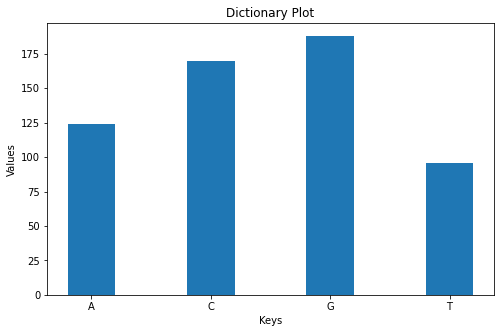

In [20]:
import matplotlib.pyplot as plt

# Extract keys and values
keys = list(dict.keys())
values = list(dict.values())

# Plotting

#### START

plt.figure(figsize=(8, 5))
plt.bar(keys, values, width=0.4)
#plt.plot(keys, values)
#plt.scatter(keys, values)

# Adding labels and title
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Dictionary Plot')

# Display the plot
plt.show()


**Calculate (A+T) / (C+G) ratio per sequence after loading multiple sequences from a file**

* The purpose of this notebook is to allow you to become familiar with the concepts of file parsing, loading file contents into convenient data structures and performing operations on loaded data in a convenient way.
* This notebook can also serve as a useful guide with hints useful for solving the PWM exercise.

In [22]:
sequences_file = 'gata3.txt'

sequences_as_list_of_lists = list() # initiate an empty list to hold the information that we will load from the file
seq_file_fh = open(sequences_file, 'r') # open a connection to the file and attach it to a file handle
for line in seq_file_fh: # use the file handle as a proxy to loop through the lines of the file one-by-one
    line = line.rstrip('\n') # remove the newline character from the end of the string
    #print(line)
    
    line_as_list = list(line.upper())
    #print(line_as_list)
    
    sequences_as_list_of_lists.append(line_as_list)
    #print(sequences_as_list_of_lists)
    #print()
seq_file_fh.close() # detach the file handle from the file and close the connection to the file

print(sequences_as_list_of_lists)

[['A', 'G', 'A', 'T', 'A', 'G'], ['A', 'G', 'A', 'T', 'A', 'G'], ['A', 'G', 'A', 'T', 'A', 'G'], ['A', 'G', 'A', 'T', 'A', 'G'], ['C', 'G', 'A', 'T', 'A', 'G'], ['A', 'G', 'A', 'T', 'A', 'C'], ['A', 'G', 'A', 'T', 'A', 'A'], ['G', 'G', 'A', 'T', 'A', 'C'], ['C', 'G', 'A', 'T', 'T', 'G'], ['C', 'G', 'A', 'T', 'T', 'G'], ['A', 'G', 'A', 'T', 'A', 'G'], ['A', 'G', 'A', 'G', 'A', 'G'], ['C', 'G', 'A', 'T', 'A', 'C'], ['A', 'G', 'A', 'T', 'T', 'G'], ['C', 'G', 'A', 'T', 'A', 'G'], ['A', 'G', 'A', 'T', 'A', 'C'], ['A', 'G', 'A', 'T', 'A', 'A'], ['G', 'G', 'A', 'T', 'A', 'C'], ['C', 'G', 'A', 'T', 'T', 'G'], ['C', 'G', 'A', 'T', 'T', 'G']]


* The cell above essentially creates a 2-dimentional array/matrix
* What if our objective is to go through the elements of such an array one-by-one, and perform some calculations? How can we do it?
* For example, how can we calculate the (A+T)/(G+C) ratio for each row in this 2-D array?

In [23]:
for row_idx in range(len(sequences_as_list_of_lists)): # Loop through each element of the list (each element is another list)
    #print(sequences_as_list_of_lists[row_idx])
    
    # initialize 2 variables that will hold the AT and GC counts
    a_and_t = 0
    g_and_c = 0
    
    for col_idx in range(len(sequences_as_list_of_lists[row_idx])): # Loop through each element of the nested list
        #print(sequences_as_list_of_lists[row_idx][col_idx])
        
        if sequences_as_list_of_lists[row_idx][col_idx] == 'A': # check if the element is equal to 'A'
            a_and_t += 1
        elif sequences_as_list_of_lists[row_idx][col_idx] == 'T': # check if the element is equal to 'T'
            a_and_t += 1
        elif sequences_as_list_of_lists[row_idx][col_idx] == 'G': # check if the element is equal to 'G'
            g_and_c += 1
        else: # if all 3 conditions above are false then we expect 'C'
            g_and_c += 1
        
        # Are these if-elif-else conditions safe enough?
    
    #print('Row ' + str(row_idx) + ': A+T=' + str(a_and_t) + ' | G+C=' + str(g_and_c) + ' | Ratio=' + str(a_and_t/g_and_c))
    #g_and_c = 0
    if g_and_c == 0:
        print('ERROR: denominator is 0')
    else:
        print('Row %d: A+T=%d | G+C=%d | Ratio=%f' % (row_idx, a_and_t, g_and_c, (a_and_t/g_and_c)))
    # How can we use print in a prettier form?
    
    # Is the calculation of the ratio safe enough?

Row 0: A+T=4 | G+C=2 | Ratio=2.000000
Row 1: A+T=4 | G+C=2 | Ratio=2.000000
Row 2: A+T=4 | G+C=2 | Ratio=2.000000
Row 3: A+T=4 | G+C=2 | Ratio=2.000000
Row 4: A+T=3 | G+C=3 | Ratio=1.000000
Row 5: A+T=4 | G+C=2 | Ratio=2.000000
Row 6: A+T=5 | G+C=1 | Ratio=5.000000
Row 7: A+T=3 | G+C=3 | Ratio=1.000000
Row 8: A+T=3 | G+C=3 | Ratio=1.000000
Row 9: A+T=3 | G+C=3 | Ratio=1.000000
Row 10: A+T=4 | G+C=2 | Ratio=2.000000
Row 11: A+T=3 | G+C=3 | Ratio=1.000000
Row 12: A+T=3 | G+C=3 | Ratio=1.000000
Row 13: A+T=4 | G+C=2 | Ratio=2.000000
Row 14: A+T=3 | G+C=3 | Ratio=1.000000
Row 15: A+T=4 | G+C=2 | Ratio=2.000000
Row 16: A+T=5 | G+C=1 | Ratio=5.000000
Row 17: A+T=3 | G+C=3 | Ratio=1.000000
Row 18: A+T=3 | G+C=3 | Ratio=1.000000
Row 19: A+T=3 | G+C=3 | Ratio=1.000000
